In [230]:
using Plots, QuadGK
pyplot()
include("../src.jl")

Main.vopp

In [234]:
linspace(0, 4, 100)

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[234]:1
└ @ Core In[234]:1


0.0:0.04040404040404041:4.0

## Mean Abs Dev Plots

### Illustrating calls for debugging and timing

In [212]:
mu = 1
S = 5
M = 1
mode = 1.2
dev = .7999

#r_mp_p, best_price_p, dist = vopp._vopp_lb_primal_unimodal_MAD(mu, S, M, dev, mode)
#r_mp_uni, best_price_uni = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode)
#r_mp, best_price = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev)
#(r_mp_uni, best_price_uni), (r_mp, best_price)

# println("UB Analytic")
#vopp.vopp_ub_MAD(S, M, dev), vopp.vopp_ub_MAD(S, M, dev, method=:Optimization)


# println("UB Unimodal")
#@time vopp.vopp_ub_unimodal_MAD(mu, S, M, dev, mode)

# println("UB Symmetric")
#@time vopp.vopp_ub_symmetric_MAD(mu, S, M, dev, mode)  

# println("LB Analytic")
#@time vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, method=:Formula)

# println("LB UNIMODAL")
# @time vopp_uni, best_price_uni = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, safe_fail = false, pj = .8)
# @time vopp_uni_p, best_price_uni_p, tvals, dist = vopp._vopp_lb_primal_unimodal_MAD(mu, S, M, dev, mode, pj = .8)
#_vopp_lb_primal_unimodal_MAD(mu, S, M, D, mode; N) in Main.vopp at /Users/vishalgupta/Documents/Research/PersonalizedPricing/TeX/VoPP_OptProblems/debugging.jl:40()

# println("LB Symmetric")
# @time vopp_sym, best_price_sym = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev, safe_fail=true,)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(1.0319529492392754, 1.033007740818065)

In [164]:
##Can inspect an approximate tight distribution in this way.
println((best_price_uni_p, best_price_sym))
filt = dist .> 0
[tvals[filt] dist[filt]]


(0.8, 0.893044002577722)


2×2 Array{Float64,2}:
 0.0  0.84
 5.0  0.16

In [162]:
(1/vopp_uni, best_price_uni), (1/vopp_uni_p, best_price_uni_p), (1 - 2*dev)
#, (1/vopp_sym, best_price_sym), (1-2*dev)

((0.3520000000000001, 0.8), (0.3519999999999999, 0.8), 0.30000000000000004)

In [214]:
#Rough Loop over dev_grid
S = 2
M = 1
mu = 1
mode = 1

#dev_grid = range(0., stop=vopp.max_dev(S, M) - 1e-3, length=50)
dev_grid = range(0., stop=.5, length=20)
ub_analytic = zero(dev_grid)
ub_uni = zero(dev_grid)
ub_sym = zero(dev_grid)

lb_analytic = zero(dev_grid)
lb_uni = zero(dev_grid)
lb_sym = zero(dev_grid)

for (ix, dev) in enumerate(dev_grid)
    println("Dev:\t", dev)
    ub_analytic[ix] = vopp.vopp_ub_MAD(S, M, dev)[1]  
#     ub_uni[ix] = vopp.vopp_ub_unimodal_MAD(mu, S, M, dev, mode)  
#     ub_sym[ix] = vopp.vopp_ub_symmetric_MAD(mu, S, M, dev, mode)  

#     lb_analytic[ix] = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, method=:Formula)  
#     lb_uni[ix]   = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, safe_fail=true)[1]
#     lb_sym[ix] = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev, safe_fail = true)[1]    
end

┌ Warning: Deprecated syntax `implicit assignment to global variable `dev``.
│ Use `global dev` instead.
└ @ nothing none:0
┌ Warning: Loop variable `dev` around In[214]:16 overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing In[214]:16


Dev:	0.0
Dev:	0.02631578947368421
Dev:	0.05263157894736842
Dev:	0.07894736842105263
Dev:	0.10526315789473684
Dev:	0.13157894736842105
Dev:	0.15789473684210525
Dev:	0.18421052631578946
Dev:	0.21052631578947367
Dev:	0.23684210526315788
Dev:	0.2631578947368421
Dev:	0.2894736842105263
Dev:	0.3157894736842105
Dev:	0.34210526315789475
Dev:	0.3684210526315789
Dev:	0.39473684210526316
Dev:	0.42105263157894735
Dev:	0.4473684210526316
Dev:	0.47368421052631576
Dev:	0.5


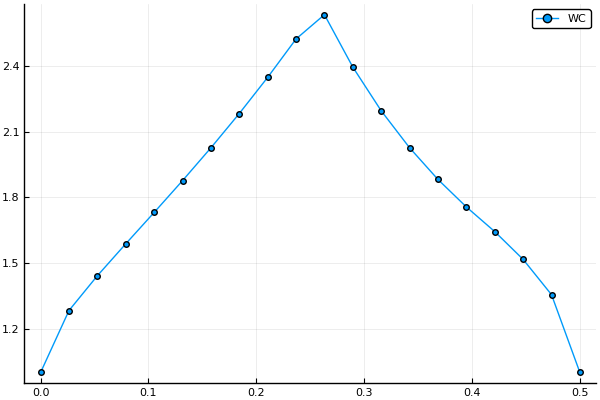

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [216]:
plot(dev_grid, ub_analytic, marker=:circ, label="WC")
# plot(dev_grid[ub_uni .> 0], ub_uni[ub_uni .> 0], label="Uni")
# plot!(dev_grid[ub_sym .> 0], ub_sym[ub_sym .> 0], label="Uni+Symmetric")
# #plot!(dev_grid[lb_analytic .> 0], lb_analytic[lb_analytic .> 0], linestyle=:dash, label="WC-Uni")
# plot!(dev_grid[lb_uni .> 0], lb_uni[lb_uni .> 0], linestyle=:dash, label="Uni")
# plot!(dev_grid[lb_sym .> 0], lb_sym[lb_sym .> 0], linestyle=:dash, label="Sym")

# #[dev_grid wc_bound]

### Coefficient of Variation

In [15]:
using Plots, QuadGK
pyplot()
include("../src.jl")

Main.vopp

In [20]:
S = 2
M = 1
mu = 1
mode = 1
# @time vopp.vopp_ub_CV(S, M, mu, .1, method=:ConstraintGeneration)
# @time vopp.vopp_ub_unimodal_CV(mu, S, M, .1, mode)
# @time vopp.vopp_ub_symmetric_CV(mu, S, M, .1, mode)
# @time vopp.vopp_lb_unimodal_CV(mu, S, M, .1, mode)
#@time vopp._vopp_lb_primal_unimodal_CV(mu, S, M, 0.5763502691896258, mode)
@time vopp.vopp_lb_symmetric_CV(mu, S, M, 0.5763502691896258; safe_fail = true)
# vopp.max_cv_unimodal_guess(mu, S, M, mode)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

(1.993482929260067, 0.9891538205273408)

In [29]:
S = 2
M = 1
mu = 1
mode = 1

cv_grid = range(0, stop=vopp.max_cv_unimodal_guess(mu, S, M, mode), length=10)

#max_unimodal_cv = vopp.max_cv_unimodal_guess(mu, S, M, mode)

ub = zero(cv_grid)
ub_uni = zero(cv_grid)
ub_sym = zero(cv_grid)

lb_uni = zero(cv_grid)
lb_sym = zero(cv_grid)

for ix = 1:length(cv_grid)
    println("CV:\t", cv_grid[ix])
    ub[ix]  = vopp.vopp_ub_CV(S, M, mu, cv_grid[ix], method=:ConstraintGeneration)
    ub_uni[ix] = vopp.vopp_ub_unimodal_CV(mu, S, M, cv_grid[ix], mode)
    ub_sym[ix] = vopp.vopp_ub_symmetric_CV(mu, S, M, cv_grid[ix], mode)
    lb_uni[ix] = vopp.vopp_lb_unimodal_CV(mu, S, M, cv_grid[ix], mode, TOL=1e-4)[1]
    lb_sym[ix] = vopp.vopp_lb_symmetric_CV(mu, S, M, cv_grid[ix])[1]
end


CV:	0.0
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


0.1924500897298753
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/package

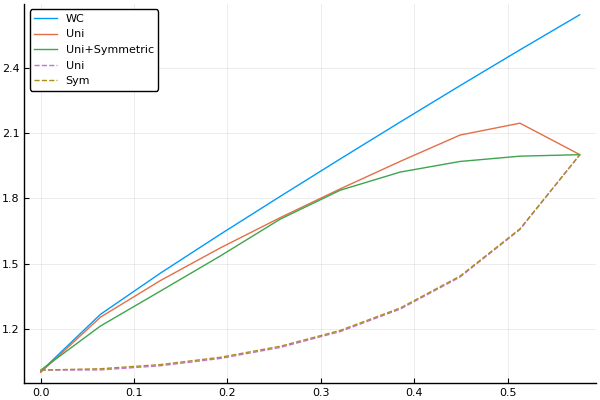

In [31]:
plot(cv_grid, ub_analytic, label="WC")
plot!(cv_grid, ub_uni, label="Uni")
plot!(cv_grid, ub_sym, label="Uni+Symmetric")
plot!(cv_grid, lb_uni, linestyle=:dash, label="Uni")
plot!(cv_grid, lb_sym, linestyle=:dash, label="Sym")

#[dev_grid wc_bound]

In [32]:
vopp.max_cv_unimodal_guess(mu, S, M, mode)

0.5773502691896258

### Geometric mean

In [ ]:
### This section is deprecated... Not all separators implemented

In [ ]:
S = 4
M = .9
mu = 1

Sc = vopp.comp_Sc(S, M)
B = 0.24
# h(t) = log(t / B)

# sep_fun(a, b, lam1, lam2, M, mu) = vopp.sep_GM(a, b, lam1, lam2, M, mu, B)                                        
# vopp._vopp_moment_primal(S, M, mu, h), vopp._vopp_moment_dual(S, M, mu, h, sep_fun), vopp._vopp_ub_GM(S, M, mu, B, false, 500)
vopp.vopp_ub_GM(S, M, mu, B, useSep=false)

In [ ]:
S = 4
M = .9  #Geometric Mean doesn't work if you have weight at zero.  
mu = 1
Sc = vopp.comp_Sc(S, M)

B_grid = range(vopp.min_gm(S, M, mu) + .01, stop=1., length=25)
out = zero(cv_grid)
out2 = zero(cv_grid)

for ix = 1:length(cv_grid)
    h(t)= -log(t/mu) + log(B_grid[ix]/mu)
    out[ix] = vopp.vopp_ub_GM(S, M, mu, B_grid[ix], useSep=true)
    out2[ix] = vopp._vopp_moment_primal(S, M, mu, h)
end


In [220]:
collect(range(1e-10, stop=vopp.delta_h(S) - 1e-10, length=10))

10-element Array{Float64,1}:
 1.0e-10            
 0.05555555563333333
 0.11111111116666667
 0.1666666667       
 0.22222222223333332
 0.2777777777666667 
 0.3333333333       
 0.38888888883333333
 0.44444444436666664
 0.4999999999       

In [224]:
#range(1e-10, stop=vopp.delta_h(S) - 1e-10, length=N)
vopp.delta_h(4)

0.75